<a href="https://colab.research.google.com/github/eunhaday/AIFFEL_quest_cr/blob/master/MainQuest/QUEST02/0912_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - 최적화(optimization) : 가능한 훈련데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
 - 일반화(zeneralization) : 훈련된 모델이 이전에 본작없는 데이터네서 얼마나 잘 수행되는지 의미

 특성선택(feature selection)을 수행하는게 일반적이다
 매니폴더가설 : 실제세상의 모든 데이터가 고차원 공간안에 있는 저차원 매니폴더에 놓여있다고 가정

 보간(Interpolation)은 주어진 데이터 포인트 사이의 값을 추정하는 방법

 딥러닝 모델은 근본적으로 매우 고차원의 곡선입니다.
 잠재매니폴더학습

홀더아웃 :  데이터분할기법
 특성이 유익하고, 잡음이 적을수록 입력공간이 더 간단하고 구조적이기 때문에 더 잘 일반화를 할수 있다.

 조밀한 샘플링
 규제(regularization)

  머신러닝 모델평가

  모델규제하기
   - 규제기법은 훈현데이터에 완벽하게 맞추려는 모델의 능력을 적극적으로 방해하는 일련의 모범사례
   - 모델의 검증점수를 향상시키는 것이 목적

 작은딥러닝 모델 : 가중치규제 (L1, L2), 모델의 복잡도에 제한을 두어 가중치가 작은값을 가지도록 강제 ,
   ** 오캄의 면도날이론 : 더 작은가정이 필요한 간단한 설명이 옳을것 이라는 이론
 큰규모 딥러닝모델 : 드롭아웃 규제
  ** 드롭아웃 : 훈련하는 동안 무작위로 층의 출력특성을 일부 제외 시킵니다.(0으로 만듭니다)


In [19]:
# 검증 정확도 비교 그래프 그리기
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history_noise' is not defined

In [ ]:
import matplotlib.pyplot as plt
val_loss_riginal = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_riginal, "b--",
         label="Validation val_loss with original channels")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation val_loss with smaller channels")
plt.title("Effect model channels on validation val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

1. 훈련이 반복됨에 따라, 일반적으로 ‘과소적합-최적적합-과대적합’의 진행과정을 보입니다.
    - 과소적합은 훈련손실과 검증손실이 함께 낮아지는 상황으로 모델의 성능이 더 개선될 수 있는 상태입니다.
    - 과대적합은 훈련손실은 감소하지만, 검증손실이 개선되지 않는(심지어 악화되는) 상태입니다.
        - (미션) 과대적합이 발생하기 쉬운 상황으로 a. 데이터의 잡음 b. 불확실성 c. 드문 특성이 있습니다. 각각의 상황이 무엇인지 예시와 함께 설명해봅시다.
            - a.이상한 mnist훈련과 레이블 샘플로 이상치에 맞추려고 하면 일반화 성능이 떨어진다.
            - b.특성공간의 모호한영역에 너무 확신을 가질경우
            - c. 드문특성값을 포함한 데이터셋에 학습한 경우 가까상관관계로 판단하게 되어 과대적합이 발생(주황색 얼룩고양이는 사교성이 없다)
2. 머신 러닝의 목표는 최적화와 일반화입니다.
    - 머신러닝 모델의 일반화 성능을 신뢰 있게 측정하기 위해서는 항상 훈련, 검증, 테스트 3개의 세트로 나누어야합니다.
        - 검증세트의  성능을 기반으로 하이퍼파라미터 튜닝을 진행하여 좋은 설정을 찾아냅니다.
        - (미션) 검증 세트와 테스트 세트 모두 훈련에 참여하지 않습니다. 그렇다면 굳이 나누어야하는 이유는 왜 일까요? 혹은 테스트 세트의 결과를 바탕으로 튜닝을 하면 안되는 것일까요? 정보 누설의 개념과 연관하여 위 질문에 답하여 보세요.
            - 검증세트의 모델성능에 기반하여 모델의 하이퍼 파라메터를 조정하면 검증데이터의 정보가 모델로 새게 됩니다. 모델조정을 여러번 반복하게 되면 검증세트에 관한 정보가 많이 노출되게 되어 결국 검증데이터에 최적화된 모델이 되어 새로운 데이터셋이 들어올경우 일반화 성능을 왜곡시킬 소지가 있음.
3. 훈련 성능을 향상하기 위한 다양한 방법이 있습니다.
    - 하이퍼 파라미터 튜닝을 통해 훈련과정을 설정할 수 있습니다. 옵티마이저, 가중치 초기화, 학습률, 배치 크기 등이 있습니다. 각각 학습단계에서 어디에 해당하는지 떠올려 봅시다. (경사하강법의 핵심파라메터 튜닝하기 p.199)
    - 데이터의 종류와 특성에 맞는 신경망 구조를 사용하거나,  모델의 용량을 늘릴 수 있습니다.
        - 가장 대표적으로 이미지 데이터는 CNN, 순차적인 데이터는 RNN 구조가 적합하다고 알려져 있습니다.
        - (미션) 왜 Dense layer는 이미지 데이터와 순차적인 데이터를 다루기에 적합하지 않을까요? 각 데이터의 특성을 고려해서 생각해봅시다.

            - ** 이미지는 2D (혹은 3D, 예: RGB 채널) 공간적 구조를 가지고 있습니다. 인접한 픽셀은 종종 서로 관련이 있으며, 이 관계는 이미지의 중요한 특성입니다.
              ** Dense 레이어는 입력의 모든 픽셀에 대해 직접 연결을 만들지만, 입력 데이터의 공간적 구조를 무시합니다. 즉, 이미지의 픽셀들 간의 위치 관계를 고려하지 않기 때문에, 공간적 패턴을 잘 학습하지 못합니다 (Convolutional Neural Networks (CNNs) 이용)

             - ** 순차적인 데이터는 시간에 따라 변화하는 정보가 포함되어 있으며, 이전 단계의 데이터가 다음 단계의 데이터에 영향을 미칠 수 있습니다. Dense 레이어는 입력 데이터의 순서나 시간적 의존성을 고려하지 않습니다. 즉, 데이터가 순차적으로 처리될 때 이전 데이터의 정보를 유지하거나 참조하지 않습니다 (Recurrent Neural Networks (RNNs): RNN 이용)


        - 모델이 충분히 학습하지 못하는(과소적합) 경우, 용량을 늘려 모델의 표현능력을 키워줄 수 있습니다.
4. 과대 적합된 모델의 일반화 성능향상을 위해 여러 방법을 적용할 수 있습니다.
    - 데이터 큐레이션은 데이터셋이 적절한지 확인하는 단계입니다. p.204
        - 데이터셋의 크기 충분성 검토, 레이블 할당 에러 및 이상치 교정, 데이터 정제 등이 있습니다.
    - 특성공학을 적절히 적용하는 것도 좋은 방법입니다. p.205
        - 데이터의 특성을 간단하게 표현하여, 잠재 매니폴드를 간단한 구조로 변환합니다.
    - 가중치 규제, 드롭아웃 같은 규제를 적용하는 것은 매우 일반적인 방법입니다. p.207
        - 드롭아웃의 경우 랜덤하게 특성을 제외 합니다. p.213
        - (미션) 4장에서 학습했던 모델에 가중치 규제나 드롭아웃을 적용해보고, 적용하지 않은 모델과 비교해봅시다. 로이터 데이터셋을 분류하는 모델을 학습시킨 학습 곡선과 가중치 규제를 적용한 모델의 학습 곡선, 드롭아웃 레이어를 추가한 모델의 학습 곡선을 비교해봅시다.
            

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3590 - loss: 3.2593 - val_accuracy: 0.5850 - val_loss: 1.9023
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.6307 - loss: 1.7309 - val_accuracy: 0.6919 - val_loss: 1.3877
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7429 - loss: 1.2264 - val_accuracy: 0.7349 - val_loss: 1.2002
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7854 - loss: 0.9893 - val_accuracy: 0.7671 - val_loss: 1.0781
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8223 - loss: 0.8082 - val_accuracy: 0.7690 - val_loss: 1.0137
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8578 - loss: 0.6791 - val_accuracy: 0.7881 - val_loss: 0.9521
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8810 - loss: 0.5717 - val_accuracy: 0.8052 - val_loss: 0.9121
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9029 - loss: 0.4955 - val_accuracy: 0.8081 -

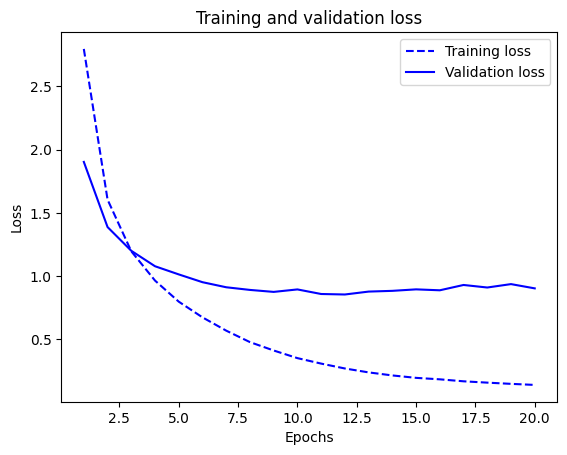

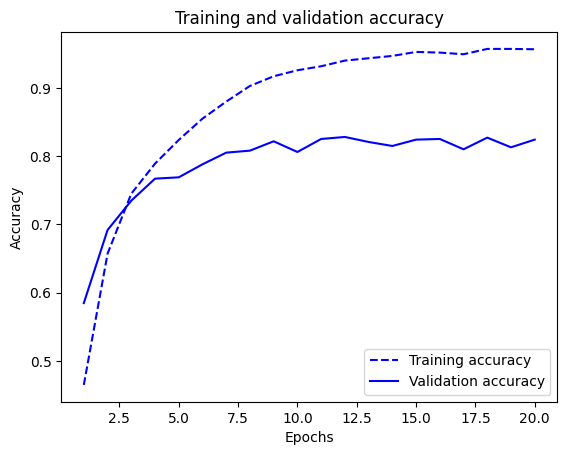

In [36]:
import tensorflow as tf
tf.keras.backend.set_floatx('float16')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

#정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#데이터 인코딩하기
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

"""
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
"""

#모델 정의하기
#--------------------
def get_model():
    #모델 정의하기
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
    ])
    #모델 컴파일하기
    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model


#검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#모델 훈련하기
model = get_model() #모델객체선언

history_reuters_org = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#훈련과 검증 손실 그리기
loss = history_reuters_org.history["loss"]
val_loss = history_reuters_org.history["val_loss"]
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#훈련과 검증 정확도 그리기
plt.clf()
acc = history_reuters_org.history["accuracy"]
val_acc = history_reuters_org.history["val_accuracy"]
#plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, acc, "b--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#(미션) 4장에서 학습했던 모델에 가중치 규제나 드롭아웃을 적용해보고, 적용하지 않은 모델과 비교해봅시다.
#로이터 데이터셋을 분류하는 모델을 학습시킨 학습 곡선과
#가중치 규제를 적용한 모델의 학습 곡선,
#드롭아웃 레이어를 추가한 모델의 학습 곡선을 비교해봅시다.


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.4080 - loss: 3.2637 - val_accuracy: 0.6152 - val_loss: 1.8760
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6700 - loss: 1.6391 - val_accuracy: 0.6919 - val_loss: 1.3848
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7392 - loss: 1.2032 - val_accuracy: 0.7388 - val_loss: 1.1846
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7896 - loss: 0.9684 - val_accuracy: 0.7588 - val_loss: 1.0674
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8247 - loss: 0.8102 - val_accuracy: 0.7788 - val_loss: 1.0029
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8558 - loss: 0.6811 - val_accuracy: 0.7930 - val_loss: 0.9341
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8773 - loss: 0.5708 - val_accuracy: 0.8052 - val_loss: 0.9019
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8968 - loss: 0.4843 - val_accuracy: 0.8081 - val_lo

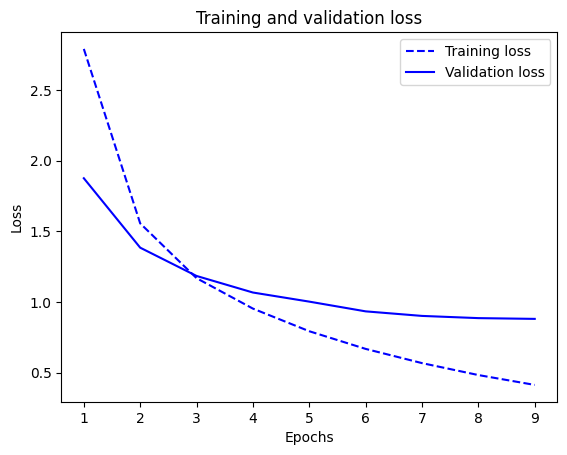

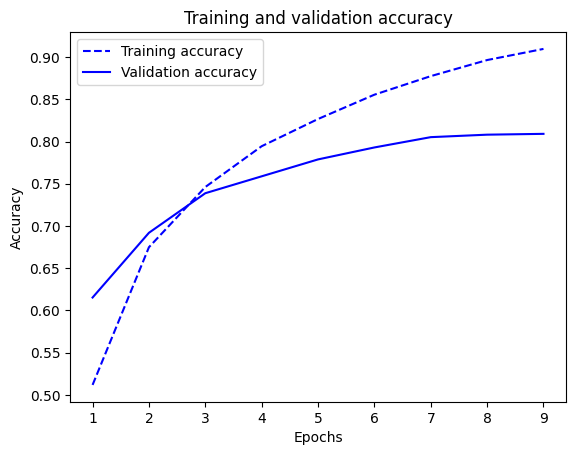

'\nval_acc_noise = history_reuters_org.history["val_accuracy"]\nval_acc_zeros = history_zeros.history["val_accuracy"]\nepochs = range(1, 11)\nplt.plot(epochs, val_acc_noise, "b-",\n         label="Validation accuracy with noise channels")\nplt.plot(epochs, val_acc_zeros, "b--",\n         label="Validation accuracy with zeros channels")\nplt.title("Effect of noise channels on validation accuracy")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.legend()\nplt.show()\n'

In [37]:
#모델을 처음부터 다시 훈련하기
model = get_model()
history_reuters_chg = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

#훈련과 검증 손실 그리기
plt.clf()
loss = history_reuters_chg.history["loss"]
val_loss = history_reuters_chg.history["val_loss"]
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#훈련과 검증 정확도 그리기
plt.clf()
acc = history_reuters_chg.history["accuracy"]
val_acc = history_reuters_chg.history["val_accuracy"]
#plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, acc, "b--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#검증 정확도 비교 그래프 그리기
#import matplotlib.pyplot as plt
"""
val_acc_noise = history_reuters_org.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
"""

#훈련된 모델로 새로운 데이터에 대해 예측하기
#predictions = model.predict(x_test)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.3887 - loss: 3.1882 - val_accuracy: 0.6230 - val_loss: 1.8379
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6691 - loss: 1.6375 - val_accuracy: 0.6880 - val_loss: 1.4082
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7348 - loss: 1.2293 - val_accuracy: 0.7310 - val_loss: 1.2236
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7808 - loss: 1.0429 - val_accuracy: 0.7539 - val_loss: 1.1104
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8236 - loss: 0.8608 - val_accuracy: 0.7759 - val_loss: 1.0303
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8521 - loss: 0.6952 - val_accuracy: 0.7920 - val_loss: 0.9722
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8795 - loss: 0.5849 - val_accuracy: 0.8032 - val_loss: 0.9302
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8955 - loss: 0.5031 - val_accuracy: 0.8062 - val_loss:

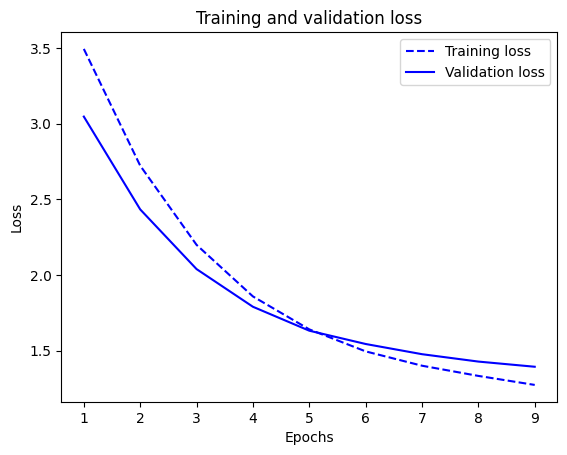

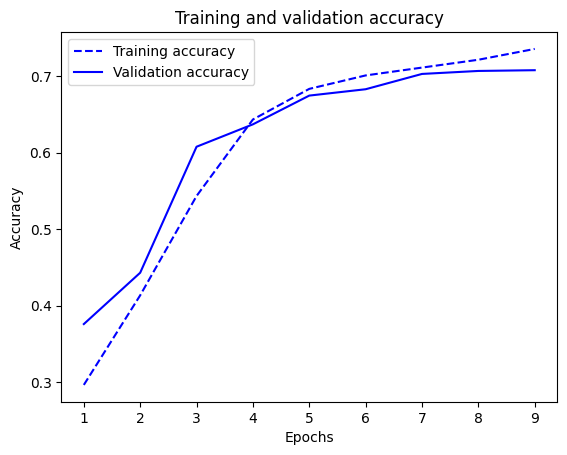

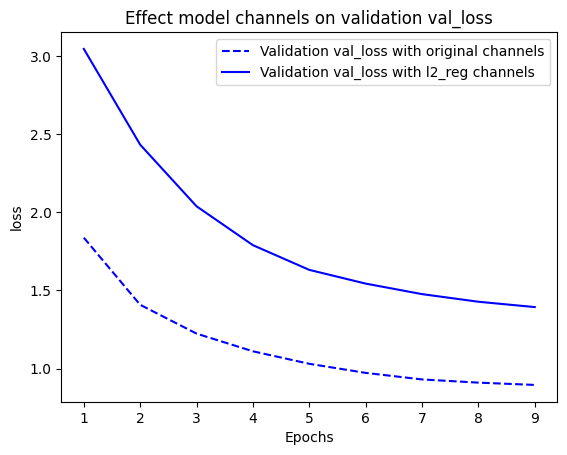

In [40]:
#가중치적용
#과대적합을 완화하기 위한 일반적인 방법은, 모델의 복잡도에 제한을 두어
#가중치가 작은값을 가지도록 강제하는것 (L1,L2)

import tensorflow as tf
tf.keras.backend.set_floatx('float16')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


#--------------------
#모델 정의하기
#--------------------
def get_model(gbn):
    if gbn == 1:
        #모델 정의하기
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
        ])
    else:
        model = keras.Sequential([
            layers.Dense(16,
                        kernel_regularizer=regularizers.l2(0.002),
                        activation="relu"),
            layers.Dense(16,
                        kernel_regularizer=regularizers.l2(0.002),
                        activation="relu"),
            layers.Dense(46, activation="softmax")
        ])

    #모델 컴파일하기
    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#데이터 인코딩하기
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


#검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


#모델 훈련하기1
model = get_model(1) #모델객체선언
history_org = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
                    #validation_split=0.4)

results = model.evaluate(x_test, y_test)


#모델 훈련하기2
model = get_model(2) #모델객체선언
history_l2_reg = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
                    #validation_split=0.4)

results = model.evaluate(x_test, y_test)


#훈련과 검증 손실 그리기
loss = history_l2_reg.history["loss"]
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#훈련과 검증 정확도 그리기
plt.clf()
acc = history_l2_reg.history["accuracy"]
val_acc = history_l2_reg.history["val_accuracy"]
#plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, acc, "b--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#검증손실에 대한 L2가중치 적용후 비교 그리기
val_loss_org = history_org.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss_org, "b--",
         label="Validation val_loss with original channels")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="Validation val_loss with l2_reg channels")
plt.title("Effect model channels on validation val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3445 - loss: 3.2587 - val_accuracy: 0.6079 - val_loss: 1.7998
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6701 - loss: 1.5924 - val_accuracy: 0.7070 - val_loss: 1.3359
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7504 - loss: 1.1755 - val_accuracy: 0.7422 - val_loss: 1.1738
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7913 - loss: 0.9779 - val_accuracy: 0.7520 - val_loss: 1.0840
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8298 - loss: 0.8068 - val_accuracy: 0.7959 - val_loss: 0.9912
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8613 - loss: 0.6708 - val_accuracy: 0.8032 - val_loss: 0.9463
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8848 - loss: 0.5259 - val_accuracy: 0.8188 - val_loss: 0.9209
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9020 - loss: 0.4659 - val_accuracy: 0.8208 - val_los

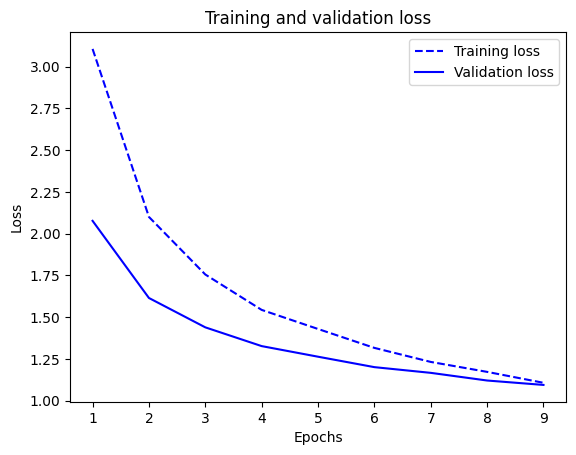

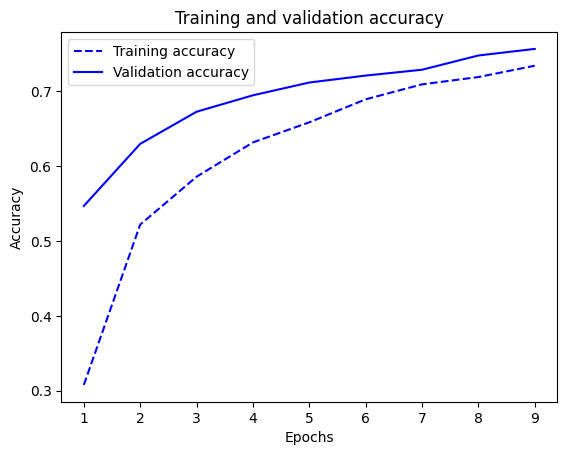

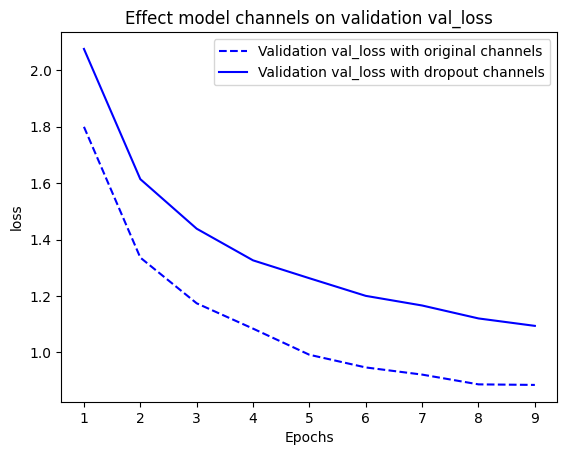

In [41]:
#드롭아웃 레이어를 추가한 모델의 학습 곡선을 비교해봅시다.

import tensorflow as tf
tf.keras.backend.set_floatx('float16')
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


#--------------------
#모델 정의하기
#--------------------
def get_model(gbn):
    if gbn == 1:
        #모델 정의하기
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
        ])
    else:
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(46, activation="softmax")
        ])

    #모델 컴파일하기
    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#데이터 인코딩하기
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


#검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


#모델 훈련하기1
model = get_model(1) #모델객체선언
history_org = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
                    #validation_split=0.4)

results = model.evaluate(x_test, y_test)


#모델 훈련하기2
model = get_model(2) #모델객체선언
history_dropout = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
                    #validation_split=0.4)

results = model.evaluate(x_test, y_test)


#훈련과 검증 손실 그리기
loss = history_dropout.history["loss"]
val_loss = history_dropout.history["val_loss"]
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, loss, "b--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#훈련과 검증 정확도 그리기
plt.clf()
acc = history_dropout.history["accuracy"]
val_acc = history_dropout.history["val_accuracy"]
#plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, acc, "b--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#검증손실에 대한 L2가중치 적용후 비교 그리기
val_loss_org = history_org.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss_org, "b--",
         label="Validation val_loss with original channels")
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation val_loss with dropout channels")
plt.title("Effect model channels on validation val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
